# üçÉ Verdant: Classifica√ß√£o multi-classe de fitopatologias usando CNNs

**Verdant** √© um prot√≥tipo de aplicativo m√≥vel para diagn√≥stico de fitopatologias (doen√ßas e pragas em plantas), desenvolvido por Matheus Ritton em 2025 como parte do Trabalho de Conclus√£o do curso de Sistemas de Informa√ß√£o da Universidade Federal Rural do Rio de Janeiro (UFRRJ).

### üíª Sobre este notebook

Este notebook de cunho acad√™mico foi criado para realizar testes entre diferentes modelos de CNNs, de forma a estudar e discutir suas performances para um problema de classifica√ß√£o de imagens. Foi utilizado como base o dataset **[PlantVillage](https://arxiv.org/abs/1511.08060)**.

Dataset utilizado: https://data.mendeley.com/datasets/tywbtsjrjv/1

### üí¨ O que ser√° discutido aqui?
O notebook √© dividido por se√ß√µes baseadas em diferentes modelos que foram usados como testes para resolver um problema de classifica√ß√£o multi-classe.

* No in√≠cio de cada se√ß√£o dos modelos haver√° uma breve apresenta√ß√£o sobre.
* Ser√° apresentado o script de forma l√≥gica, ajustes feitos (caso haja) e gr√°ficos de performance.
* Ao final, com base nos dados coletados, ser√° mostrado qual foi o modelo escolhido para a API do Verdant.

### üìì Requisitos necess√°rios:
* **No√ß√£o b√°sica de Python e TensorFlow** - para entendimento da l√≥gica de programa√ß√£o;
* **No√ß√£o b√°sica de conceitos como Aprendizado Profundo (Deep Learning) e Redes Neurais Convolucionais (CNNs)** - para compreens√£o sobre a arquitetura e l√≥gica dos modelos;

## üìö Download do dataset


In [ ]:
# Bibliotecas necess√°rias
import tensorflow as tf
import zipfile
import os
import shutil
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import cv2

# Espec√≠ficas do TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Espec√≠ficas para M√©tricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Checando a vers√£o do TensorFlow
print(tf.__version__)

2.18.0


In [ ]:
# Download do dataset
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

# Descompactar o arquivo
zip_ref = zipfile.ZipFile("file_downloaded")
zip_ref.extractall()
zip_ref.close()

--2025-05-07 17:58:57--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-05-07 17:58:58--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.66.104, 3.5.70.35, 3.5.72.186, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.66.104|:443... conne

In [ ]:
dataset_path = pathlib.Path("Plant_leave_diseases_dataset_with_augmentation/")

## üîé Inspecionando o dataset

In [ ]:
# Diret√≥rios
!ls Plant_leave_diseases_dataset_with_augmentation/

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Background_without_leaves
 Blueberry___healthy
 Cherry___healthy
 Cherry___Powdery_mildew
'Corn___Cercospora_leaf_spot Gray_leaf_spot'
 Corn___Common_rust
 Corn___healthy
 Corn___Northern_Leaf_Blight
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
# Arquivos de uma pasta espec√≠fica
!ls Plant_leave_diseases_dataset_with_augmentation/Potato___healthy/

'image (1000).JPG'  'image (325).JPG'  'image (550).JPG'  'image (776).JPG'
'image (100).JPG'   'image (326).JPG'  'image (551).JPG'  'image (777).JPG'
'image (101).JPG'   'image (327).JPG'  'image (552).JPG'  'image (778).JPG'
'image (102).JPG'   'image (328).JPG'  'image (553).JPG'  'image (779).JPG'
'image (103).JPG'   'image (329).JPG'  'image (554).JPG'  'image (77).JPG'
'image (104).JPG'   'image (32).JPG'   'image (555).JPG'  'image (780).JPG'
'image (105).JPG'   'image (330).JPG'  'image (556).JPG'  'image (781).JPG'
'image (106).JPG'   'image (331).JPG'  'image (557).JPG'  'image (782).JPG'
'image (107).JPG'   'image (332).JPG'  'image (558).JPG'  'image (783).JPG'
'image (108).JPG'   'image (333).JPG'  'image (559).JPG'  'image (784).JPG'
'image (109).JPG'   'image (334).JPG'  'image (55).JPG'   'image (785).JPG'
'image (10).JPG'    'image (335).JPG'  'image (560).JPG'  'image (786).JPG'
'image (110).JPG'   'image (336).JPG'  'image (561).JPG'  'image (787).JPG'
'image (111).

In [ ]:
# Descobrindo quantas imagens tem em cada diret√≥rio
total = 0

for dirpath, dirnames, filenames in os.walk("Plant_leave_diseases_dataset_with_augmentation"):
  total += len(filenames)
  print(f"T√™m {len(dirnames)} diret√≥rios e {len(filenames)} imagens em '{dirpath}'.")

print(f"Total de {total} imagens.")

T√™m 39 diret√≥rios e 0 imagens em 'Plant_leave_diseases_dataset_with_augmentation'.
T√™m 0 diret√≥rios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Tomato___Early_blight'.
T√™m 0 diret√≥rios e 1192 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Corn___Common_rust'.
T√™m 0 diret√≥rios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Raspberry___healthy'.
T√™m 0 diret√≥rios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Cherry___healthy'.
T√™m 0 diret√≥rios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Peach___healthy'.
T√™m 0 diret√≥rios e 1383 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Grape___Esca_(Black_Measles)'.
T√™m 0 diret√≥rios e 1109 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Strawberry___Leaf_scorch'.
T√™m 0 diret√≥rios e 1076 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
T√™m 0 diret√≥rios e 1835 im

Image shape: (256, 256, 3)


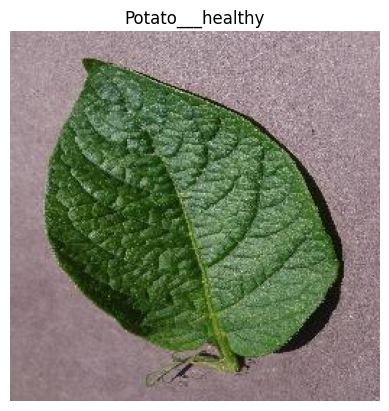

In [ ]:
# Visualizando aleatoriamente algumas imagens de um diret√≥rio do dataset

def view_random_image(target_dir, target_class):
  # Configura√ß√µes
  target_folder = target_dir + target_class

  # Pegando um caminho aleat√≥rio de image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Lendo a imagem e exibindo-a
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image("Plant_leave_diseases_dataset_with_augmentation/", "Potato___healthy")

## ‚ùóPrepara√ß√£o pr√©-modelos

**Execu√ß√£o obrigat√≥ria!** Nesta se√ß√£o se encontram c√≥digos e fun√ß√µes que ser√£o reaproveitados ao longo dos testes nos modelos, simplificando posteriormente algumas etapas dos experimentos.

In [ ]:
# Lista de classes de interesse de estudo
study_classes = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

> üîë **Nota:** O dataset PlantVillage possui diversas imagens (um total de mais de 60.000) associadas as suas respectivas classes. Por√©m, para fins pr√°ticos, o escopo ser√° reduzido, facilitando o treinamento dos modelos.



In [ ]:
# Excluindo as demais classes
for dirname in os.listdir(dataset_path):

  dirpath = os.path.join(dataset_path, dirname)

  if os.path.isdir(dirpath) and dirname not in study_classes:
    shutil.rmtree(dirpath)
    print(f"Pasta {dirpath} removida!")

class_names = np.array(sorted([item.name for item in dataset_path.glob('*')]))
print(f"\nClasses atuais: ", class_names)

Pasta Plant_leave_diseases_dataset_with_augmentation/Soybean___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Grape___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Corn___Northern_Leaf_Blight removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Corn___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot) removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Strawberry___Leaf_scorch removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Tomato___Spider_mites Two-spotted_spider_mite removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Black_rot removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Cedar_apple_rust removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Tomato___Leaf_Mold removida!
Pasta Plant_leave_diseases_dataset_

In [ ]:
# Preparando o dataset

img_size = (224, 224)
batch_size = 32

# Carregando dataset de treino (80% das imagens)
train_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                                 validation_split=0.2,
                                                                 subset="training",
                                                                 seed=36,
                                                                 label_mode="categorical",
                                                                 image_size=img_size,
                                                                 batch_size=batch_size
                                                                 )

# Carregando dataset de valida√ß√£o (20% das imagens)
val_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=36,
                                                               label_mode="categorical",
                                                               image_size=img_size,
                                                               batch_size=batch_size
                                                               )

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
# Camada de Normaliza√ß√£o
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# Aplica√ß√£o de normaliza√ß√£o
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

### Fun√ß√µes Essenciais

In [ ]:
# Fun√ß√£o para importar uma imagem and redimensionar para ser usada no modelo
def load_and_prep_image(filename, img_shape=224):

  """
  L√™ uma imagem atrav√©s do filename, transforma em um tensor e redimensiona-o para
  (img_shape, image_shape, color_channels)
  """

  # L√™ uma imagem
  img = tf.io.read_file(filename)

  # Decodificar o arquivo lido em um tensor
  img = tf.image.decode_image(img)

  # Redimensiona a imagem
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Aplica normaliza√ß√£o
  img = img/255.
  return img

In [ ]:
# Fun√ß√£o para fazer uma previs√£o com um modelo e plotar a imagem
def pred_and_plot(model, filename, class_names):

  """
  Importa uma imagem atrav√©s do filename, faz uma previs√£o com um modelo e plota
  a imagem com a classe prevista como t√≠tulo
  """

  #Importa a imagem e a preprocessa
  img = load_and_prep_image(filename)

  #Faz uma previs√£o
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plota a imagem e a classe prevista
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

### Fun√ß√µes de Visualiza√ß√£o

In [ ]:
# Fun√ß√£o para visualizar as regi√µes que mais contribu√≠ram para a decis√£o do modelo
def make_gradcam_heatmap(img_array, model, pred_index=None):

    """
    Gera um mapa de calor Grad-CAM para uma imagem de entrada.
    """

    # Obtendo o nome da √∫ltima camada convolucional do modelo base
    last_conv_layer_name = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][-1]
    last_deep_layer = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)][-1]

    # Criando um modelo auxiliar que mapeia a imagem de entrada at√© a sa√≠da da √∫ltima
    # camada convolucional
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer).output]
    )

    # Gravamos as opera√ß√µes e calculamos o gradiante da classe principal prevista
    # em rela√ß√£o a √∫ltima camada connvolucional
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Gradiente da classe escolhida em rela√ß√£o as sa√≠das da √∫ltima camada convolucional
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Calculamos a m√©dia dos gradientes para cada canal da camada convolucional,
    # obtendo um peso (quanto maior, mais importante para a classe prevista)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Pesamos cada sa√≠da da √∫ltima camada convolucional usando os valores m√©dios
    # dos gradientes, somando todos os canais e criando o heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normaliza√ß√£o do heatmap, para facilitar a visualiza√ß√£o e sobreposi√ß√£o com a
    # imagem original
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Fun√ß√£o para visualizar sobreposi√ß√£o do heatmap com a imagem original
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    Salva e exibe o mapa de calor Grad-CAM sobre a imagem original.
    """

    # Carrega a imagem original
    img = mpimg.imread(img_path)
    img = img / 255.0 if img.max() > 1 else img  # Normaliza se necess√°rio
    img_height, img_width = img.shape[:2]

    # Reajusta o heatmap para o intervalo 0-255
    heatmap = np.uint8(255 * heatmap)

    # Redimensiona o heatmap para o tamanho da imagem original
    heatmap = cv2.resize(heatmap, (img_width, img_height))

    # Aplica colormap "jet"
    jet = plt.cm.jet(heatmap)[..., :3]

    # Sobrep√µe o mapa de calor √† imagem
    superimposed_img = jet * alpha + img * (1 - alpha)
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Salva a imagem com o mapa de calor
    plt.imsave(cam_path, superimposed_img)

    # Exibe
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

In [ ]:
# Fun√ß√£o para visualizar a imagem original juntamente com seu heatmap (OPCIONAL)
def visualize_heatmap(img, heatmap):

  """
  Visualiza a imagem original e o mapa de calor Grad-CAM lado a lado.
  """

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Exibe imagem original
  axes[0].imshow(img)
  axes[0].set_title("Imagem Original")
  axes[0].axis("off")

  # Exibe o heatmap
  axes[1].imshow(heatmap)
  axes[1].set_title("Mapa de Calor Grad-CAM")
  axes[1].axis(False)

  plt.tight_layout()
  plt.show()

### Fun√ß√µes de M√©tricas

In [ ]:
# Plota a curvas de valida√ß√£o e treinamento separadas
def plot_all_metrics(history):

  """
  Plota as curvas de valida√ß√£o e treinamento por √©poca separadas para todas as m√©tricas.
  """
  metrics = {"loss": "Perda", "accuracy": "Acur√°cia", "precision": "Precis√£o", "recall": "Recall"}

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
  axes = axes.flatten()

  epochs = list(range(len(history.history["loss"])))

  for i, (metric, translated_metric) in enumerate(metrics.items()):
    train_key = metric
    val_key = f"val_{metric}"

    if train_key in history.history.keys() and val_key in history.history:
        df = pd.DataFrame({
            "√âpoca": epochs,
            "Treinamento": history.history[train_key],
            "Valida√ß√£o": history.history[val_key]
        })
        df_long = df.melt(id_vars="√âpoca", var_name="Tipo", value_name="Valor")

        sns.set_theme(style="darkgrid")
        sns.lineplot(data=df_long, x="√âpoca", y="Valor", hue="Tipo", ax=axes[i], marker="o")
        axes[i].set_title(f"{translated_metric} por √âpoca")
        axes[i].set_xlabel("√âpocas")
        axes[i].set_ylabel(translated_metric)
        axes[i].legend(title="Conjunto")
        axes[i].grid(True)

  # Remove subplot vazio se num_metrics < n√∫mero de subplots criados
  if len(metrics) < len(axes):
      for j in range(len(metrics), len(axes)):
          fig.delaxes(axes[j])

  plt.tight_layout()
  plt.suptitle("Desempenho do Modelo por M√©trica", fontsize=16, y=1.02)
  plt.show()

In [ ]:
# Fun√ß√£o que retorna m√©tricas
def evaluate_model_metrics(model, val_data):

  """
  Avalia o modelo usando o conjunto de valida√ß√£o e retorna o valor final de acur√°cia, precis√£o,
  recall e F1-score. Plota a matriz de confus√£o.
  """

  y_true = []
  y_pred = []

  for images, labels in val_data:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    if preds.ndim > 1:
        y_pred.extend(np.argmax(preds, axis=1))
    else:
        y_pred.extend([np.argmax(preds)])

  # C√°lculo das m√©tricas
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
  recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

  # Exibe relat√≥rio
  print("Relat√≥rio de Classifica√ß√£o:\n")
  print(classification_report(y_true, y_pred, digits=4, zero_division=0))

  # Matriz de confus√£o
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names if len(class_names) > 0 else np.unique(y_true),
    yticklabels=class_names if len(class_names) > 0 else np.unique(y_true))
  plt.xlabel("Previs√£o")
  plt.ylabel("Real")
  plt.title("Matriz de Confus√£o")
  plt.show()

  return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
  }

## Modelo 1: Teste

In [ ]:
# Construindo o modelo
model_1 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(3, activation='softmax'),
])

# Compilando o modelo
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy", "precision", "recall"]
)

In [ ]:
model_1.summary()

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 222, 222, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 220, 220, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_12 (Conv2D)              ‚îÇ (None, 218, 218, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)  ‚îÇ (None, 109, 109, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_13 (Conv2D)              ‚îÇ (None, 107, 107, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_14 (Conv2D)              ‚îÇ (None, 105, 105, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_5 (MaxPooling2D)  ‚îÇ (None, 52, 52, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_2 (Flatten)             ‚îÇ (None, 86528)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 3)              ‚îÇ       259,587 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 297,475 (1.13 MB)

 Trainable params: 297,475 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinando o modelo
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=(len(val_data))
                        )

Epoch 1/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 141ms/step - accuracy: 0.5273 - loss: 0.9866 - precision: 0.6258 - recall: 0.3295 - val_accuracy: 0.9083 - val_loss: 0.2122 - val_precision: 0.9129 - val_recall: 0.9083
Epoch 2/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 137ms/step - accuracy: 0.8854 - loss: 0.2926 - precision: 0.8941 - recall: 0.8756 - val_accuracy: 0.9417 - val_loss: 0.1530 - val_precision: 0.9417 - val_recall: 0.9417
Epoch 3/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 125ms/step - accuracy: 0.9566 - loss: 0.1184 - precision: 0.9569 - recall: 0.9561 - val_accuracy: 0.9117 - val_loss: 0.2122 - val_precision: 0.9132 - val_recall: 0.9117
Epoch 4/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 126ms/step - accuracy: 0.9637 - loss: 0.1022 - precision: 0.9640 - recall: 0.9637 - val_accuracy: 0.8800 - val_loss: 0.3503 - val_precision: 0.8826 - val_recall: 0.8

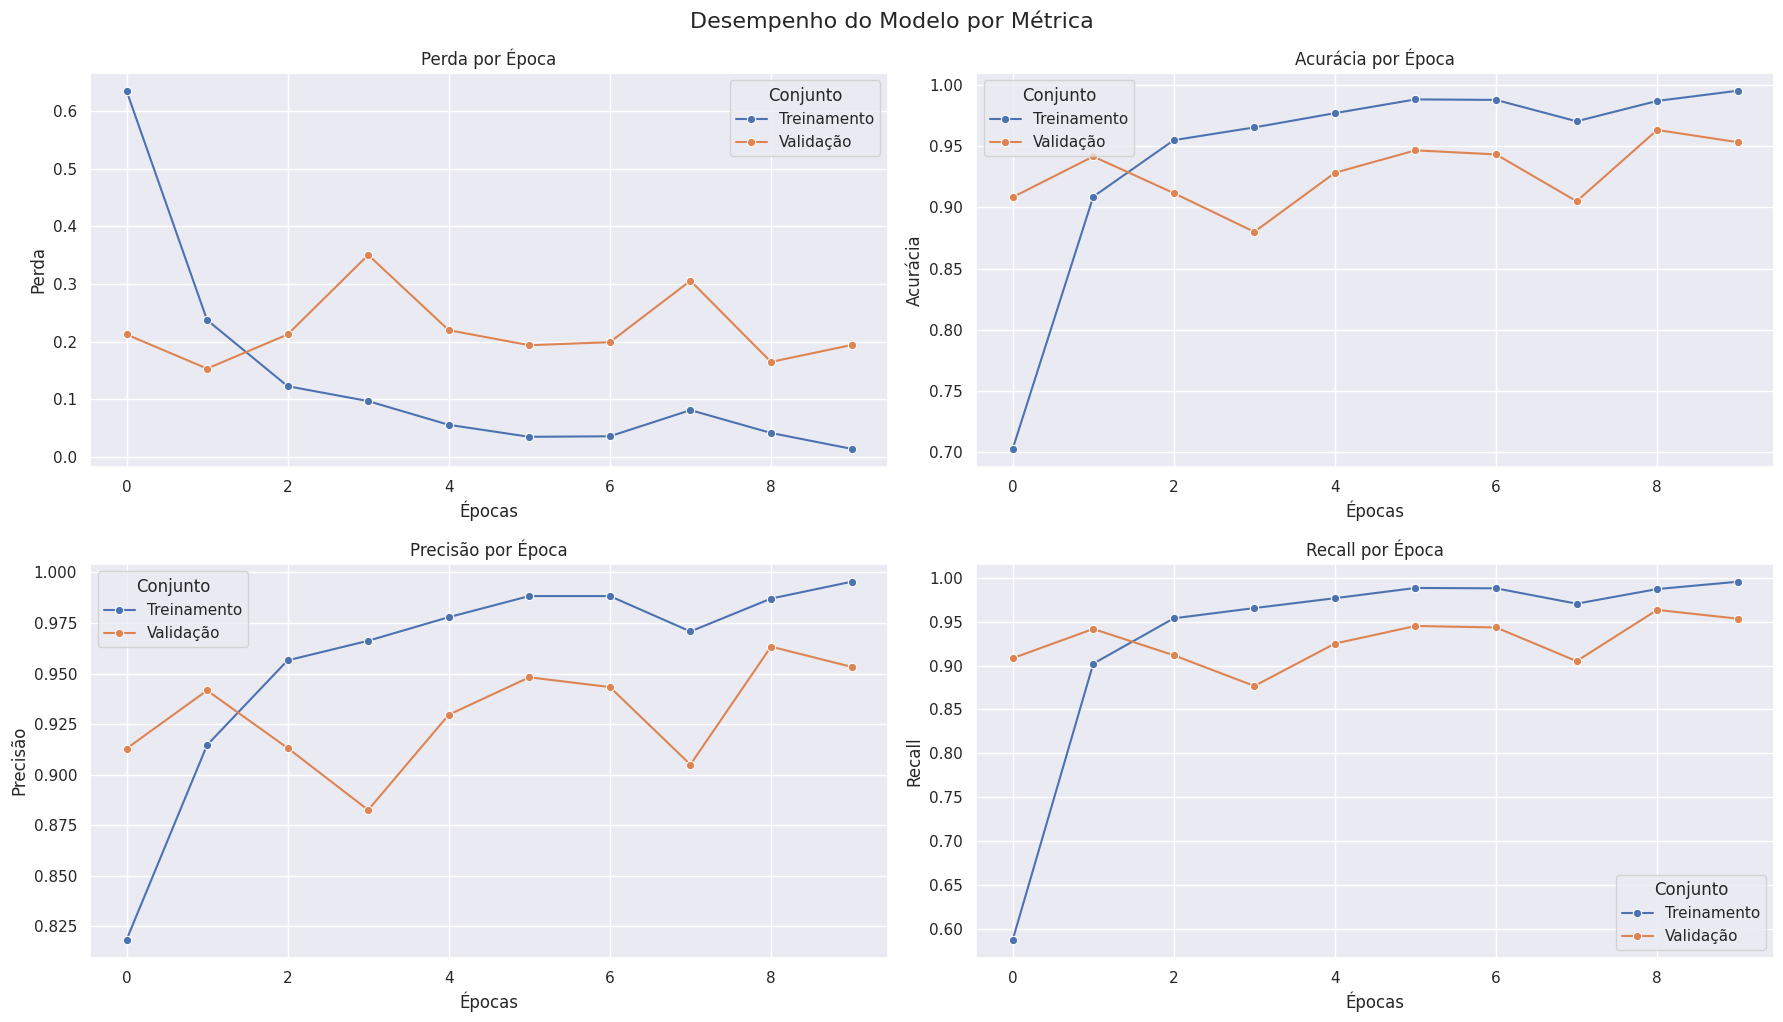

In [ ]:
plot_all_metrics(history_1)

### Usando uma imagem nova

(np.float64(-0.5), np.float64(849.5), np.float64(829.5), np.float64(-0.5))

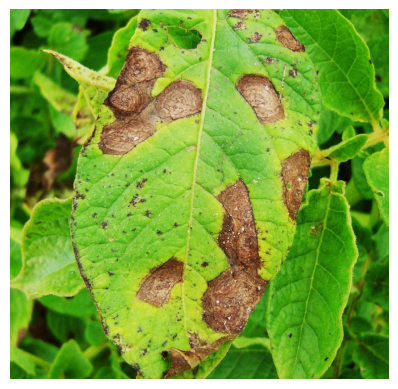

In [ ]:
# Atrav√©s de link
# !wget https://agriq.com.br/wp-content/uploads/2023/06/Blog-AgriQ_Requeima-da-batata_Creditos-Vegetable-Growers-News.jpeg

img_path = "img.jpg"
new_img = mpimg.imread(img_path)
plt.imshow(new_img)
plt.axis("off")

In [ ]:
# Prepara a imagem para o modelo
new_img = load_and_prep_image(img_path)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step


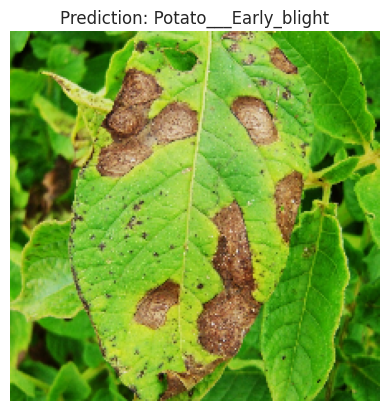

In [ ]:
# Faz a previs√£o da imagem
pred_and_plot(model_1, img_path, class_names)

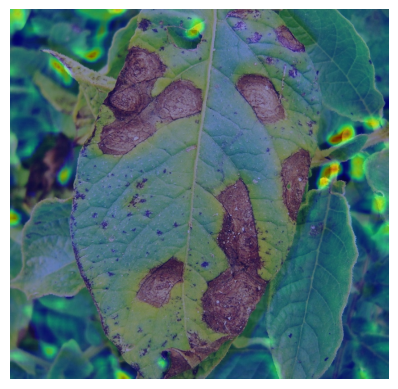

In [ ]:
img_array = tf.expand_dims(load_and_prep_image(img_path), axis=0)

heatmap = make_gradcam_heatmap(img_array, model_1)
save_and_display_gradcam(img_path, heatmap)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step


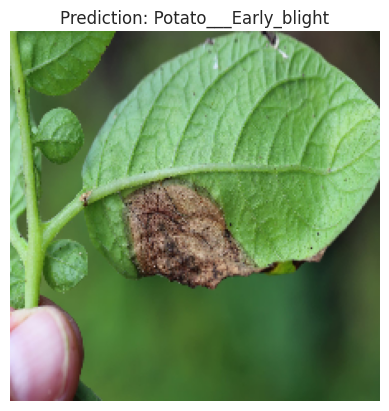

In [ ]:
img_path_2 = "img-2.jpg"
new_img_2 = mpimg.imread(img_path_2)
new_img_2 = load_and_prep_image(img_path_2)
pred_and_plot(model_1, img_path_2, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_20']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


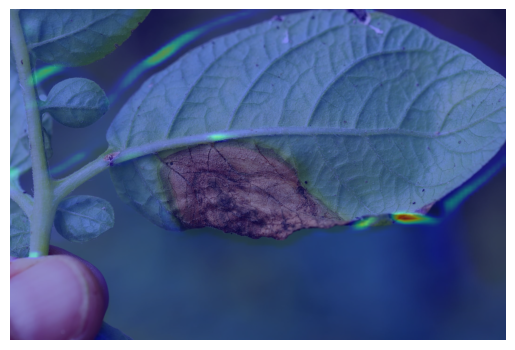

In [ ]:
img_array_2 = tf.expand_dims(load_and_prep_image(img_path_2), axis=0)

heatmap_2 = make_gradcam_heatmap(img_array_2, model_1)
save_and_display_gradcam(img_path_2, heatmap_2)

## Modelo 2: Adapta√ß√£o do Inception-V3

Este modelo usa como baseline uma adapta√ß√£o do Inception-V3, baseada na proposta de arquitetura de Toda e Okura.

> **How Convolutional Neural Networks Diagnose Plant Disease (TODA; OKURA, 2019)**
Paper original: https://spj.science.org/doi/full/10.34133/2019/9237136

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Concatenate, GaussianNoise
from tensorflow.keras.models import Model

# Bloco auxiliar: conv + BN + ReLU
def conv_bn(x, filters, kernel_size, strides=1, padding='same', name=None):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False, name=f"{name}_conv")(x)
    x = BatchNormalization(name=f"{name}_bn")(x)
    x = Activation('relu', name=f"{name}_act")(x)
    return x

# Bloco Inception V3 customizado com fatora√ß√£o
def inception_v3_style_block(x, f1, f3r, f3, f5r, f5, proj, name_prefix="incept"):
    # 1x1 conv
    path1 = conv_bn(x, f1, (1, 1), name=f"{name_prefix}_1x1")

    # 1x1 -> 1x3 -> 3x1
    path2 = conv_bn(x, f3r, (1, 1), name=f"{name_prefix}_3x3_reduce")
    path2 = conv_bn(path2, f3, (1, 3), name=f"{name_prefix}_3x3_a")
    path2 = conv_bn(path2, f3, (3, 1), name=f"{name_prefix}_3x3_b")

    # 1x1 -> 3x3 -> 3x3 (fatora√ß√£o de 5x5)
    path3 = conv_bn(x, f5r, (1, 1), name=f"{name_prefix}_5x5_reduce")
    path3 = conv_bn(path3, f5, (3, 3), name=f"{name_prefix}_5x5_a")
    path3 = conv_bn(path3, f5, (3, 3), name=f"{name_prefix}_5x5_b")

    # 3x3 maxpool -> 1x1
    path4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same', name=f"{name_prefix}_pool")(x)
    path4 = conv_bn(path4, proj, (1, 1), name=f"{name_prefix}_pool_proj")

    return Concatenate(axis=-1, name=f"{name_prefix}_concat")([path1, path2, path3, path4])

# Entrada
input_layer = Input(shape=(224, 224, 3), name="input")
x = GaussianNoise(0.1)(input_layer)

# Bloco inicial (como no diagrama)
x = conv_bn(x, 32, (3, 3), strides=2, padding='valid', name="conv1")   # 111x111
x = conv_bn(x, 32, (3, 3), padding='valid', name="conv2")             # 109x109
x = conv_bn(x, 64, (3, 3), padding='same', name="conv3")              # 109x109
x = MaxPooling2D(pool_size=(2, 2), strides=2, name="maxpool1")(x)     # 54x54

x = conv_bn(x, 80, (1, 1), padding='same', name="conv4")              # 54x54
x = conv_bn(x, 192, (3, 3), padding='valid', name="conv5")            # 52x52
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', name="maxpool2")(x)  # 25x25

# Blocos Inception customizados x6
for i in range(6):
    x = inception_v3_style_block(
        x,
        f1=128, f3r=128, f3=128,
        f5r=128, f5=128,
        proj=32,
        name_prefix=f"incept_{i}"
    )

# Finaliza√ß√£o
x = GlobalAveragePooling2D(name="global_avg_pool")(x)
output_layer = Dense(3, activation='softmax', name="output")(x)

# Modelo
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])


In [ ]:
model_2.summary()

Model: "functional_31"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input (InputLayer)  ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ                     ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gaussian_noise_3    ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ input[0][0]       ‚îÇ
‚îÇ (GaussianNoise)     ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_conv (Conv2D) ‚îÇ (None, 111, 111,  ‚îÇ        864 ‚îÇ gaussian_noise_3‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_bn            ‚îÇ (None, 111, 111,  ‚îÇ        128 ‚îÇ conv1_conv[0][0]  ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_act           ‚îÇ (None, 111, 111,  ‚îÇ          0 ‚îÇ conv1_bn[0][0]    ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_conv (Conv2D) ‚îÇ (None, 109, 109,  ‚îÇ      9,216 ‚îÇ conv1_act[0][0]   ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_bn            ‚îÇ (None, 109, 109,  ‚îÇ        128 ‚îÇ conv2_conv[0][0]  ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_act           ‚îÇ (None, 109, 109,  ‚îÇ          0 ‚îÇ conv2_bn[0][0]    ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv3_conv (Conv2D) ‚îÇ (None, 109, 109,  ‚îÇ     18,432 ‚îÇ conv2_act[0][0]   ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 3,501,443 (13.36 MB)

 Trainable params: 3,489,507 (13.31 MB)

 Non-trainable params: 11,936 (46.62 KB)

In [ ]:
history_2 = model_2.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=(len(val_data)))

Epoch 1/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68s 308ms/step - accuracy: 0.8322 - loss: 0.3981 - precision: 0.8490 - recall: 0.7960 - val_accuracy: 0.3383 - val_loss: 5.2721 - val_precision: 0.3383 - val_recall: 0.3383
Epoch 2/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 222ms/step - accuracy: 0.9346 - loss: 0.1843 - precision: 0.9413 - recall: 0.9295 - val_accuracy: 0.3383 - val_loss: 9.6271 - val_precision: 0.3383 - val_recall: 0.3383
Epoch 3/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 217ms/step - accuracy: 0.9438 - loss: 0.1471 - precision: 0.9493 - recall: 0.9433 - val_accuracy: 0.5883 - val_loss: 5.3107 - val_precision: 0.5883 - val_recall: 0.5883
Epoch 4/10
75/75 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 222ms/step - accuracy: 0.9632 - loss: 0.0956 - precision: 0.9643 - recall: 0.9625 - val_accuracy: 0.3883 - val_loss: 3.5747 - val_precision: 0.3976 - val_recall: 0.3

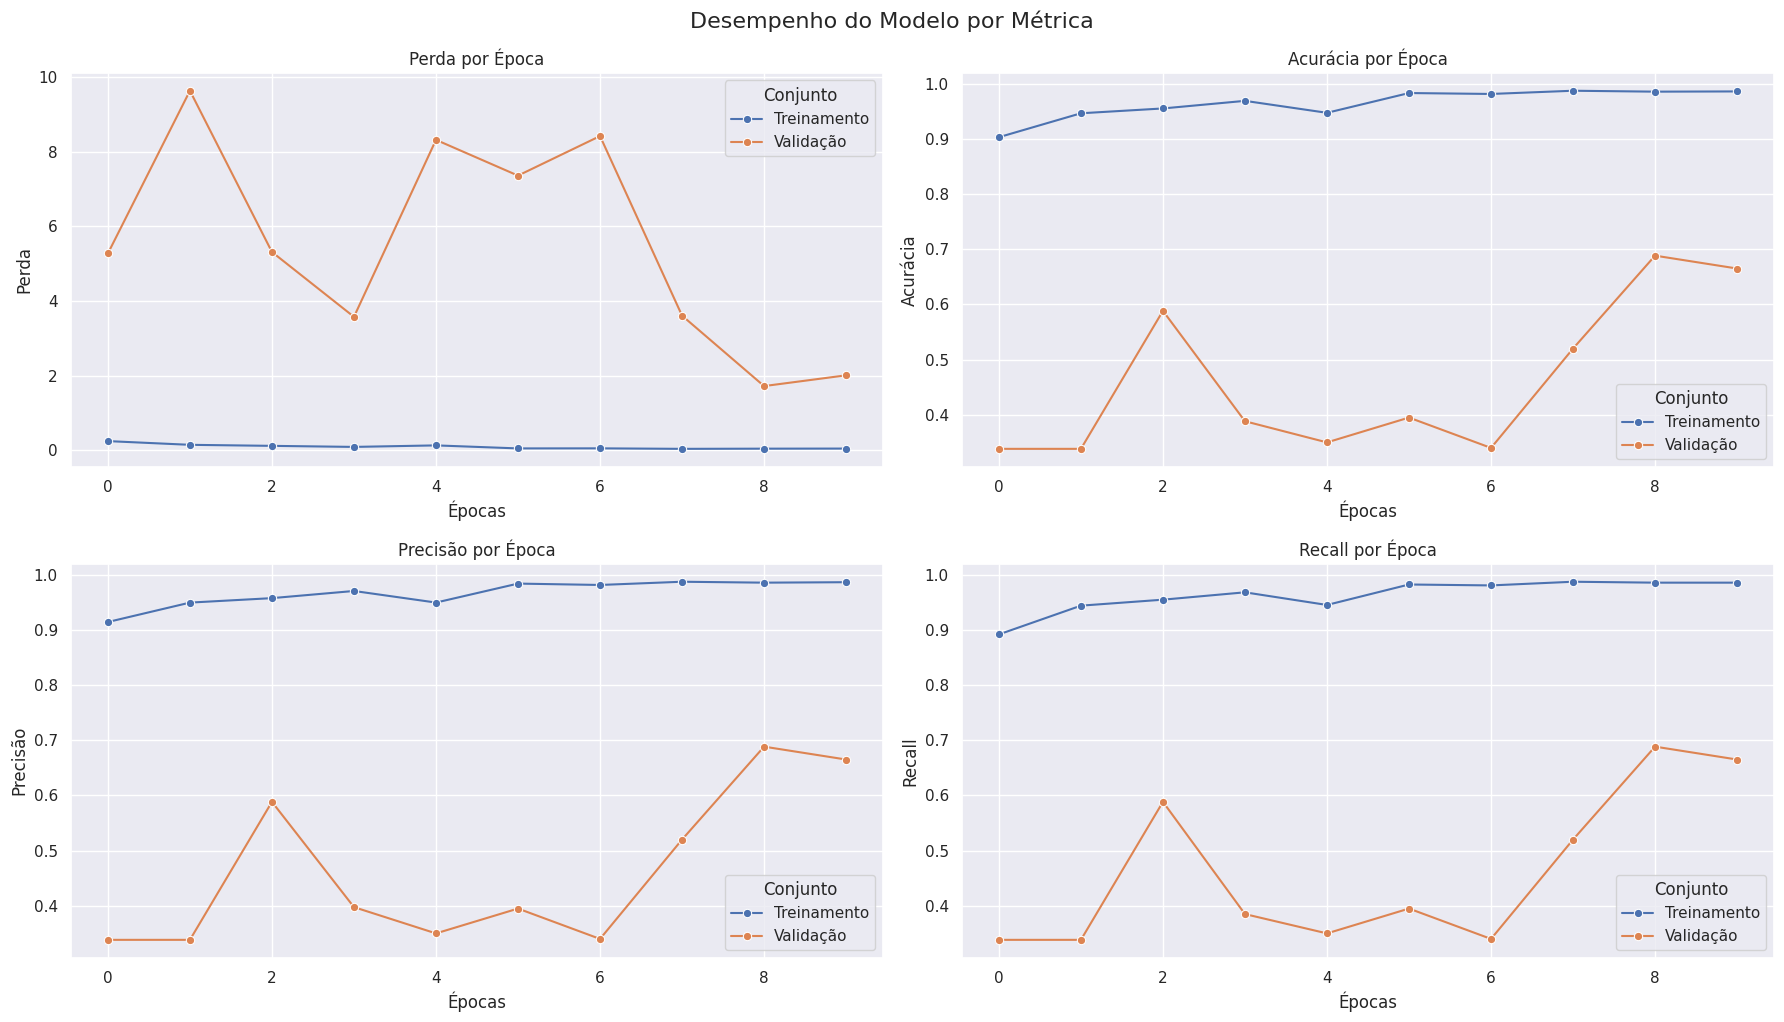

In [ ]:
plot_all_metrics(history_2)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step


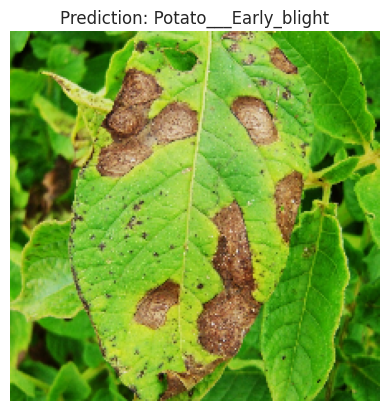

In [ ]:
img_path = "img.jpg"
new_img = mpimg.imread(img_path)
new_img = load_and_prep_image(img_path)
pred_and_plot(model_2, img_path, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


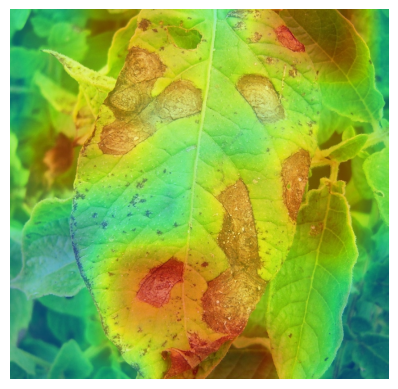

In [ ]:
img_array = tf.expand_dims(load_and_prep_image(img_path), axis=0)

heatmap = make_gradcam_heatmap(img_array, model_2)
save_and_display_gradcam(img_path, heatmap)